## アファイン変換
- アファイン変換とは回転・平行移動などの線形変換

アファイン変換の公式
- 回転やせん断変形など　,平行移動
$$
\begin{pmatrix} x' \\ y' \end{pmatrix}=\begin{pmatrix} a & b \\ c & d \end{pmatrix}\begin{pmatrix} x \\ y \end{pmatrix}+\begin{pmatrix} t_x \\ t_y \end{pmatrix}
$$

- github では下記　↓　参照（gitで正しく表示されない為）

$\begin{pmatrix} x' \\ y' \end{pmatrix}$=$\begin{pmatrix} a & b \\ c & d \end{pmatrix}$*$\begin{pmatrix} x \\ y \end{pmatrix}$+$\begin{pmatrix} t_x \\ t_y \end{pmatrix}$

- 線形変換を纏めた行列
$$
\begin{pmatrix} x' \\ y' \\1 \end{pmatrix}=\begin{pmatrix} a & b & t_x \\ c & d & t_y \\0 & 0 & 1 \end{pmatrix}\begin{pmatrix} x \\ y \\1 \end{pmatrix}
$$

- github では下記　↓　参照（gitで正しく表示されない為）

$\begin{pmatrix} x' \\ y' \\1 \end{pmatrix}$=$\begin{pmatrix} a & b & t_x \\ c & d & t_y \\0 & 0 & 1 \end{pmatrix}$*$\begin{pmatrix} x \\ y \\1 \end{pmatrix}$

- 同次座標 -> 1 = (0 0 1)(1) 

- x, y, 以外の軸(同次座標)を導入する
    - 同次座標を導入することによって、変換行列だけでアファイン変換を記述する事ができる
    
#### Open CV では変換行列を定義してアファイン変換をしていく事になる


In [1]:
import cv2
import numpy as np

In [2]:
# 画像の読み込み -> 画像のsize取得 -> 移動距離の定義
img = cv2.imread("data/src/grapes.jpg")
h, w = img.shape[:2]
dx, dy = 30, 30

In [3]:
# 変換行列の定義 30pxづつ右斜め下にずらす
afn_mat = np.float32([[1,0,dx],[0,1,dy]])
img_afn = cv2.warpAffine(img, afn_mat, (w, h))

In [4]:
cv2.imshow("trans", img_afn)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

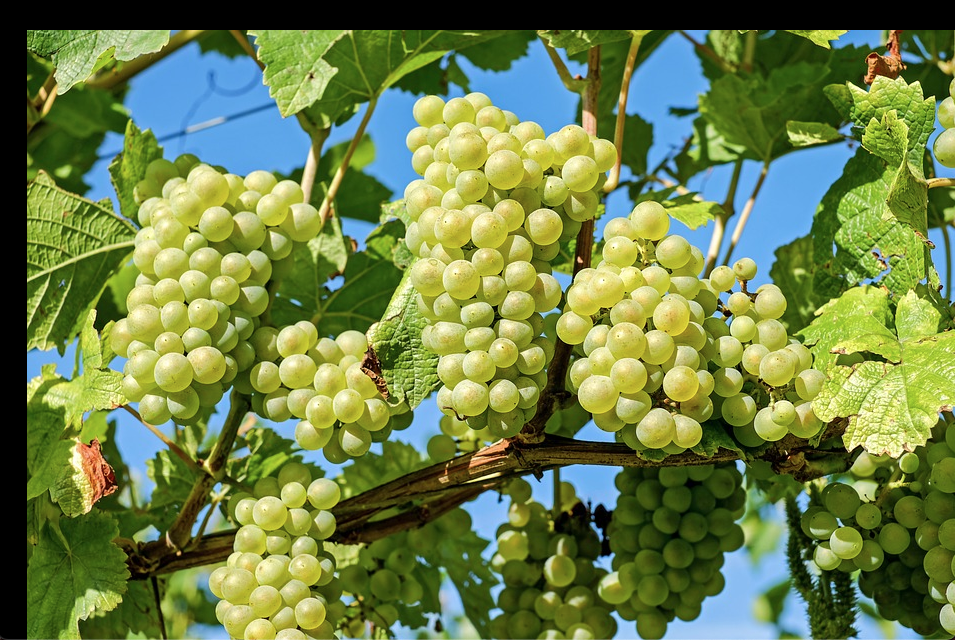

In [5]:
# 回転変換: getRotationMatrix2D 関数を使用することで簡単に回転を扱うことができる
rot_mat = cv2.getRotationMatrix2D((w/2, h/2), 40, 1)  # 回転させる場所(座標) : 回転させる角度 : 画像の拡大縮小(scale)
img_afn2 = cv2.warpAffine(img, rot_mat, (w, h))       # warpAffineを使用して変換行列を適用する : img(変換元) : 変換する matrix : 画像のsize（解像度） 

In [6]:
cv2.imshow("rotation", img_afn2)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

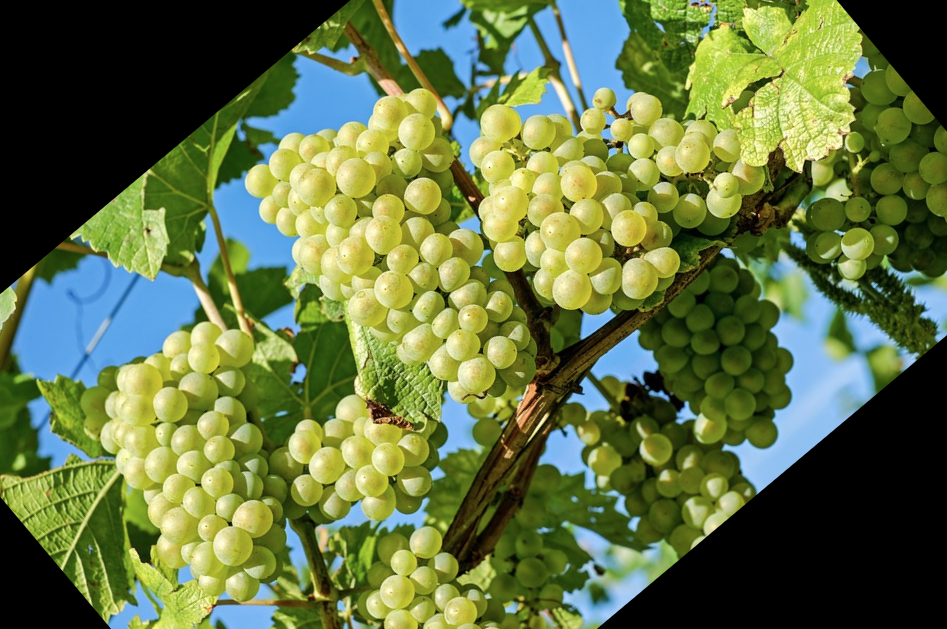

## 透視変換
- 透視変換を行うことで、奥行きある画像を描画(変換)する事ができる

In [7]:
import cv2
import numpy as np

In [8]:
img = cv2.imread("data/src/drive.jpg")
h, w = img.shape[:2]
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

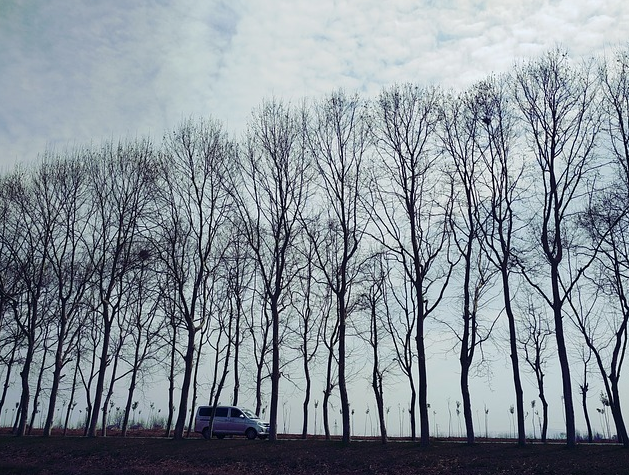

透視変換する場合には、左上の点、右上の点に対応させるように分布させる(交互に対応させる)

そうする事によって奥行き方向に分布したような画像になる

In [9]:
# 点の対応関係を作成する -> 下記の引数で指定する元の点は、対応関係をうまく調整しないと画像がおかしくなるので、あらかじめ試行錯誤した点の対応関係を使っている
per1 = np.float32([[100, 500], [300, 500], [300, 100], [100, 100]])
per2 = np.float32([[100, 500], [300, 500], [280, 200], [150, 200]])  # こちらの per2 は台形に点を対応させる。対応後の点の場所

psp_mat = cv2.getPerspectiveTransform(per1, per2) # 変換の行列を作成させる
img_psp = cv2.warpPerspective(img, psp_mat, (w, h))       # 作成した matrix を渡す -> 透視変換を行う事ができる

In [10]:
cv2.imshow("psp", img_psp)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

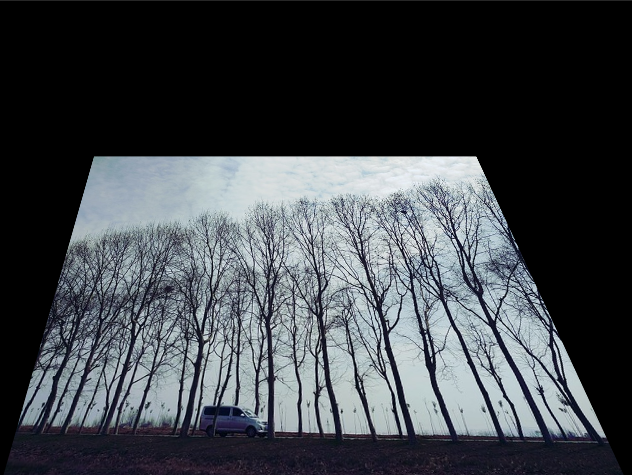

## 畳み込みの基礎

In [11]:
import cv2
import numpy as pn

kernel = np.ones((3,3)) / 9.0  # 3 * 3 の 1/9 のフィルターを用意する
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [12]:
img = cv2.imread("data/src/Lena.jpg", 0)

# 畳み込んでいく
img_ke1 = cv2.filter2D(img, -1, kernel)  # ３つの引数を与える : 入力画像 : bit深度（負の値を与えておくと元の画像と同じものを返してくれる） : kernel

cv2.imshow("img", img_ke1)
cv2.imshow("src", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

src

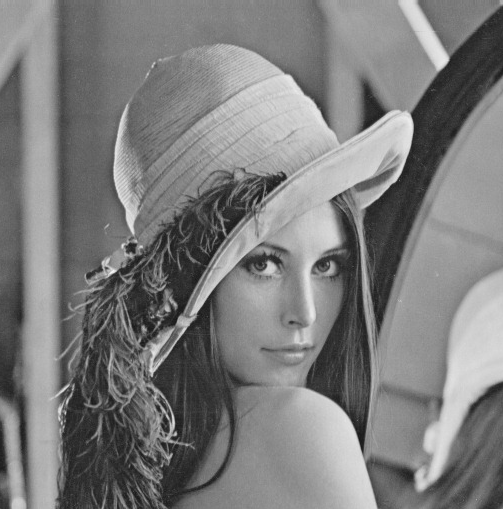

img

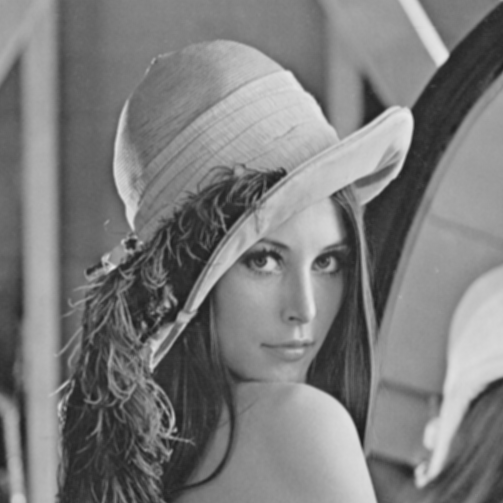

上記のようにフィルターを作成して、平滑化や微分ができる…

しかし、毎回フィルターを作成するのは手間なので<u>実際にはそれぞれに合ったフィルターを使用する事が多い</u>

### sobel フィルター

In [13]:
kernel2 = np.zeros((3, 3))
kernel2[0, 0] = 1
kernel2[1, 0] = 2
kernel2[2, 0] = 1
kernel2[0, -1] = -1
kernel2[1, 2] = -2
kernel2[2, 2] = -1

kernel2

array([[ 1.,  0., -1.],
       [ 2.,  0., -2.],
       [ 1.,  0., -1.]])

In [14]:
img_ke2 = cv2.filter2D(img, -1, kernel2)

cv2.imshow("img", img_ke2)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

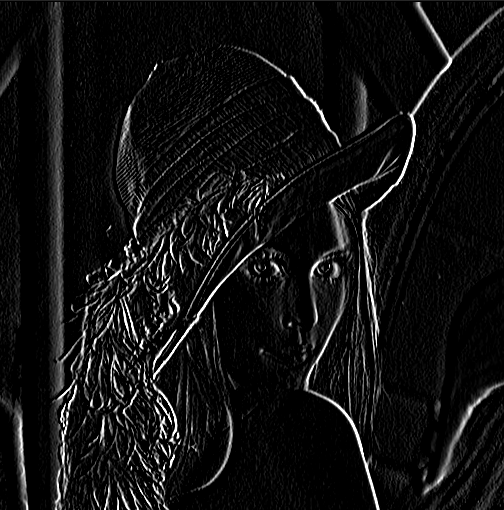

## 画像の平滑化
- 平滑化フィルターはいくつかの種類がある


In [15]:
import cv2

img = cv2.imread("data/src/buildings.jpg")

# 平滑化： もっとも単純な平滑化処理　：　画像のぼかし
img_blur = cv2.blur(img, (3, 3))  # ブラー処理：　1/9 3*3 と全く同じフィルター。引数を渡すだけで、フィルターを作らずに処理できる

cv2.imshow("img", img_blur)
cv2.imshow("src", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [16]:
# GaussianBlur : こちらも非常に有名な画像の blur（ぼかし）の処理 -> 強いぼかし、ぼかしの調整
img_ga = cv2.GaussianBlur(img, (9,9), 2)  # filter の枠の大きさ（奇数を与えてあげないとエラーが出てしまう　）：　　２の値が大きければ大きほど画像がぼやける


In [17]:
cv2.imshow("img", img_ga)
cv2.imshow("src", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [56]:
# medianBlur フィルター : 5*5 で最も出てきた色で塗りつぶす（中央値） -> 色合いが少なくなるので、画像のタッチが油絵みたいになる
img_me = cv2.medianBlur(img, 5)  # 画像 : フィルターの大きさ :

In [57]:
cv2.imshow("img", img_me)
cv2.imshow("src", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [58]:
# bilateralFilter : 輝度変化のある部分は残しておいて、輝度変化がなだらかな所を平滑化する
img_by = cv2.bilateralFilter(img, 20, 30, 30)  # 画像 : window size : エッジを保存するためのシグマ : シグマ

In [59]:
cv2.imshow("img", img_by)
cv2.imshow("src", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

2021-08-18 00:32:44.462 python3[10992:234026] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-18 00:32:44.462 python3[10992:234026] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-18 00:32:44.462 python3[10992:234026] Text input context does not respond to _valueForTIProperty:
2021-08-18 00:32:44.462 python3[10992:234026] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-18 00:32:44.463 python3[10992:234026] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-18 00:32:44.463 python3[10992:234026] Text input context does not respond to _valueForTIProperty:


-1

エッジを保存しながら、濃淡をなだらかに平滑化する

## 画像の微分
- 微分とは小さな区間の関数の変化
    - 曲線の傾き = X (微分係数)の求め方
$$
X = \frac{f(x+dx)-f(x)}{dx}
$$

- x 〜 x+dx における y の変化量 f(x+dx)

傾き = $\frac{y}{x}$ (yの変化量/xの変化量)


- 画像の微分も同じように考える事ができる
    - 画像処理での微分
    - 傾き　＝　隣の画素値 - 自分の画素値
- 画素値の場合は隣との距離 px は全て同じ距離(定数)になる
#### 画像を微分するとエッジが検出できる

## エッジの検出
- Sobel filter
- Laplacian filter

In [60]:
import cv2

In [61]:
img = cv2.imread("data/src/Lena.jpg", 0)
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

2021-08-18 00:33:07.120 python3[10992:234026] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_dismissFunctionRowItemTextInputViewWithReply:) block performed very slowly (22.46 secs).
2021-08-18 00:33:07.120 python3[10992:234026] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_dismissFunctionRowItemTextInputViewWithReply:) block performed very slowly (14.21 secs).
2021-08-18 00:33:07.120 python3[10992:234026] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-18 00:33:07.120 python3[10992:234026] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-18 00:33:07.120 python3[10992:234026] Text input context does not respond to _valueForTIProperty:
2021-08-18 00:33:07.120 python3[10992:234026] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-18 00:33:07.12

-1

### Sobel filter をかけていく

In [62]:
img_sobelx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=3)  # x 方向 : sobel は微分する方向を選ぶ事ができる
img_sobely = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=3)  # y 方向 : 

In [63]:
img_sobelx

array([[   0.,   -4.,   -6., ...,  -72., -174.,    0.],
       [   0.,   -1.,   -5., ...,  -68., -176.,    0.],
       [   0.,    3.,   -5., ...,  -58., -169.,    0.],
       ...,
       [   0.,   31.,   14., ...,   -1.,  -12.,    0.],
       [   0.,   51.,   26., ...,    6.,    9.,    0.],
       [   0.,   58.,   28., ...,   10.,   20.,    0.]], dtype=float32)

In [64]:
# 正の値も負の値も入っているので修正する ：　0~256 段階に変換
img_sobelx = cv2.convertScaleAbs(img_sobelx)
img_sobely = cv2.convertScaleAbs(img_sobely)

In [65]:
img_sobelx

array([[  0,   4,   6, ...,  72, 174,   0],
       [  0,   1,   5, ...,  68, 176,   0],
       [  0,   3,   5, ...,  58, 169,   0],
       ...,
       [  0,  31,  14, ...,   1,  12,   0],
       [  0,  51,  26, ...,   6,   9,   0],
       [  0,  58,  28, ...,  10,  20,   0]], dtype=uint8)

In [66]:
cv2.imshow("x", img_sobelx)
cv2.imshow("y", img_sobely)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

x 方向　-> 水平方向に微分 -> それと垂直な方向(垂直)方向にエッジが検出されやすい

y 方向 -> 垂直方向に微分 -> それと垂直な方向(垂直)方向にエッジが検出されやすい

#### Laplacian filter をかける

In [67]:
img_lap = cv2.Laplacian(img, cv2.CV_32F)  # 方向がないので、画像と bit深度だけ

In [68]:
img_lap = cv2.convertScaleAbs(img_lap)  # 　絶対値に変換する : 0~256 段階に変換

In [69]:
# もっとエッジをハッキリさせたい場合
img_lap *= 2  # ２倍するという指示

In [70]:
cv2.imshow("lap", img_lap)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

2021-08-18 00:33:42.106 python3[10992:234026] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-18 00:33:42.106 python3[10992:234026] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-18 00:33:42.106 python3[10992:234026] Text input context does not respond to _valueForTIProperty:
2021-08-18 00:33:42.120 python3[10992:234026] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-18 00:33:42.120 python3[10992:234026] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-18 00:33:42.120 python3[10992:234026] Text input context does not respond to _valueForTIProperty:


-1

- Laplacian は方向がないので全てのエッジが均一に検出されている
- 2次の微分なので値そのものが弱い。メリハリがないということ
- その場合は img_lap *= 2 を２倍にする。しかし一緒にノイズも載ってしまう
    - Gaussianそこで Laplacian Gaussian の出番

###  Laplacian Gaussian filter をかける

In [71]:
img_blur = cv2.GaussianBlur(img, (3, 3), 2)
img_lap2 = cv2.Laplacian(img_blur, cv2.CV_32F)
img_lap2 = cv2.convertScaleAbs(img_lap2)

# もっとエッジをハッキリさせたい場合
img_lap2 *= 2  # ２倍するという指示

cv2.imshow("lap2", img_lap2)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

2021-08-18 00:34:08.842 python3[10992:234026] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_dismissFunctionRowItemTextInputViewWithReply:) block performed very slowly (26.52 secs).
2021-08-18 00:34:08.842 python3[10992:234026] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_dismissFunctionRowItemTextInputViewWithReply:) block performed very slowly (9.88 secs).
2021-08-18 00:34:08.842 python3[10992:234026] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-18 00:34:08.842 python3[10992:234026] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-18 00:34:08.842 python3[10992:234026] Text input context does not respond to _valueForTIProperty:
2021-08-18 00:34:08.842 python3[10992:234026] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-18 00:34:08.842

-1

blru 処理によってノイスが消えている

#### Laplacian Gaussian の方がしっかりとエッジを検出する事ができる

## Canny(キャニー)
- Canny はノイズをうまく取り除き、エッジを検出する
- うまくエッジだけを残している。線画に近い

In [33]:
import cv2

img = cv2.imread("data/src/Lena.jpg", 0)

In [34]:
img_canny = cv2.Canny(img, 10, 100,)  # Canny 関数 : 画像 : 閾値、小、大(２段階設定)
cv2.imshow("Canny", img_canny)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

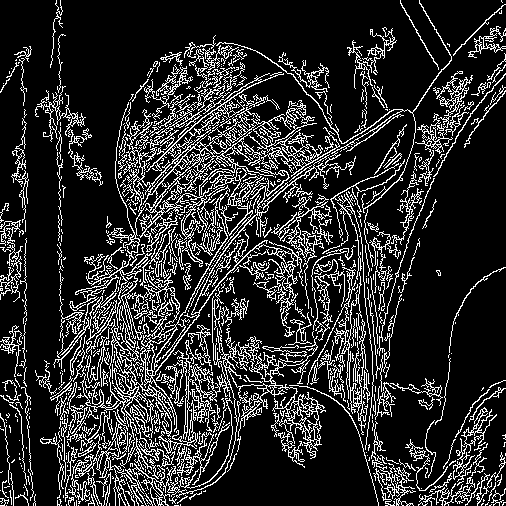

ノイズのようなものが入っているので、閾値を調整する

In [35]:
img_canny = cv2.Canny(img, 100, 200,)  # Canny 関数 : 画像 : 閾値、小、大(２段階設定)
cv2.imshow("Canny", img_canny)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1